<a href="https://colab.research.google.com/github/arisd3l/CaseStudies/blob/main/lendingClub_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Lending Club dataset contains information on loans issued by the company. The data includes the loan amount, borrower rate, borrower income, and whether the loan was paid off or defaulted on.

There are **several issues** that could potentially be present in the Lending Club dataset:

*Missing values*: It is important to check for missing values in the dataset, as they can impact the accuracy of the analysis.

*Data quality*: It is possible that the data in the dataset may be inaccurate or unreliable. For example, the borrower income may be incorrect or the loan status may be misclassified.

*Bias*: The dataset may be biased in some way, which could impact the conclusions drawn from the analysis. For example, the dataset may disproportionately represent certain groups of borrowers (e.g. those with high incomes or low credit scores).

*Outliers*: There may be outliers present in the dataset that could skew the results of the analysis. It is important to identify and handle these outliers appropriately.

*Changes over time*: The dataset covers a period of several years, during which economic and market conditions may have changed. This could affect the trends and patterns observed in the data.

Overall, it is important to carefully consider these issues when performing an analysis on the Lending Club dataset to ensure the accuracy and validity of the results.

In [51]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [53]:
# read in the Lending Club dataset
df = pd.read_csv('gdrive/My Drive/loans_full_schema.csv')

(10000, 55)
                 emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE        90000.0   
1   warehouse office clerk        10.0    HI          RENT        40000.0   
2                 assembly         3.0    WI          RENT        40000.0   
3         customer service         1.0    PA          RENT        30000.0   
4     security supervisor         10.0    CA          RENT        35000.0   

   verified_income  debt_to_income  annual_income_joint  \
0         Verified           18.01                  NaN   
1     Not Verified            5.04                  NaN   
2  Source Verified           21.15                  NaN   
3     Not Verified           10.16                  NaN   
4         Verified           57.96              57000.0   

  verification_income_joint  debt_to_income_joint  ...  sub_grade  \
0                       NaN                   NaN  ...         C3   
1                       NaN     

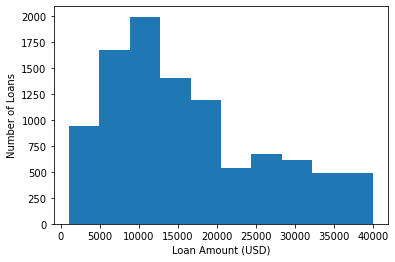

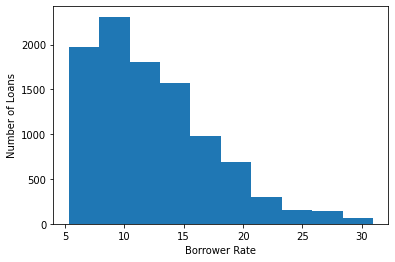

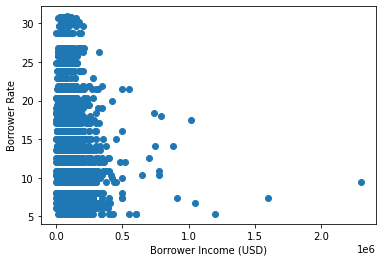

In [54]:
# print the shape of the dataset
print(df.shape)

# print the first few rows of the dataset
print(df.head())

# check the data types of each column
print(df.dtypes)

# check for missing values
print(df.isnull().sum())

# calculate the percentage of loans that were paid off
paid_off = df[df['loan_status'] == 'Paid Off'].shape[0]
total = df.shape[0]
print('Percentage of loans paid off:', paid_off / total)

# plot the distribution of loan amounts
plt.hist(df['loan_amount'])
plt.xlabel('Loan Amount (USD)')
plt.ylabel('Number of Loans')
plt.show()

# plot the distribution of borrower rates
plt.hist(df['interest_rate'])
plt.xlabel('Borrower Rate')
plt.ylabel('Number of Loans')
plt.show()

# plot the relationship between borrower income and borrower rate
plt.scatter(df['annual_income'], df['interest_rate'])
plt.xlabel('Borrower Income (USD)')
plt.ylabel('Borrower Rate')
plt.show()


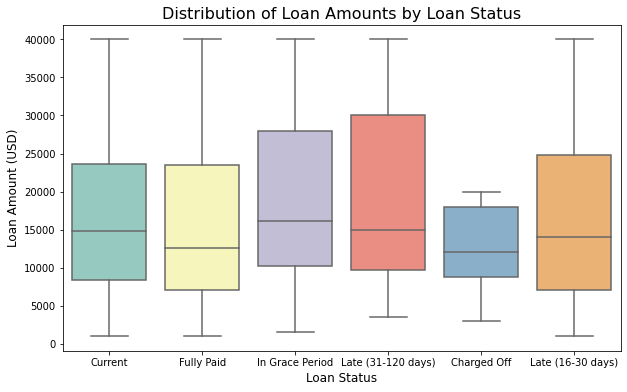

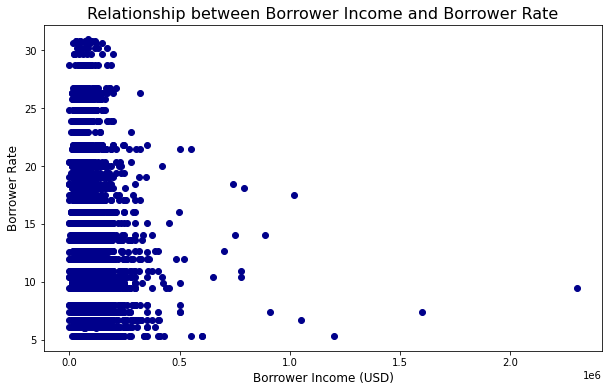

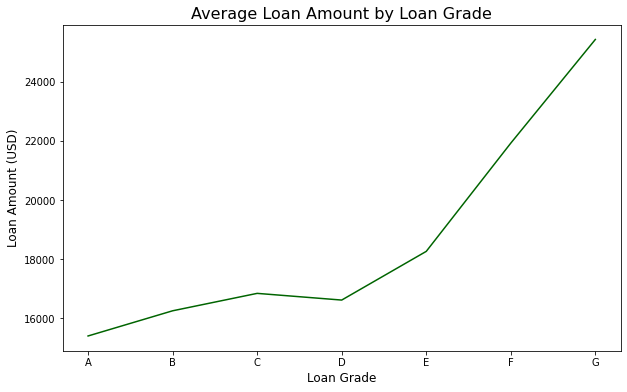

<Figure size 720x432 with 0 Axes>

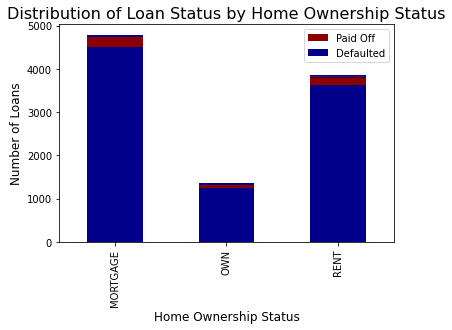

In [55]:
# create a box plot of loan amounts by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amount', data=df, palette='Set3')
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Loan Amount (USD)', fontsize=12)
plt.title('Distribution of Loan Amounts by Loan Status', fontsize=16)
plt.show()

# create a scatter plot of borrower rate vs. borrower income
plt.figure(figsize=(10, 6))
plt.scatter(df['annual_income'], df['interest_rate'], color='darkblue')
plt.xlabel('Borrower Income (USD)', fontsize=12)
plt.ylabel('Borrower Rate', fontsize=12)
plt.title('Relationship between Borrower Income and Borrower Rate', fontsize=16)
plt.show()

# create a line plot of loan amount by loan grade
plt.figure(figsize=(10, 6))
loan_amnt_by_grade = df.groupby('grade')['loan_amount'].mean()
loan_amnt_by_grade.plot(color='darkgreen')
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Loan Amount (USD)', fontsize=12)
plt.title('Average Loan Amount by Loan Grade', fontsize=16)
plt.show()

# create a bar plot of loan status by home ownership status
plt.figure(figsize=(10, 6))
loan_status_by_home_ownership = df.groupby('homeownership')['loan_status'].value_counts().unstack()
loan_status_by_home_ownership.plot(kind='bar', stacked=True, color=['darkred', 'darkblue'])
plt.xlabel('Home Ownership Status', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.title('Distribution of Loan Status by Home Ownership Status', fontsize=16)
plt.legend(['Paid Off', 'Defaulted'])
plt.show()

(43, 57)
(42, 57)


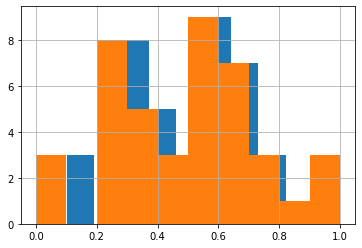

In [11]:
df.dropna(inplace=True)

# Check the shape of the dataset after removing missing values
print(df.shape)

# Remove outliers from the interest rate column
df = df[(df['interest_rate'] > 0) & (df['interest_rate'] < 20)]

# Check the shape of the dataset after removing outliers
print(df.shape)

# Check the distribution of the interest rate column
df['interest_rate'].hist()

# Normalize the interest rate column using min-max scaling
df['interest_rate'] = (df['interest_rate'] - df['interest_rate'].min()) / (df['interest_rate'].max() - df['interest_rate'].min())

# Check the distribution of the scaled interest rate column
df['interest_rate'].hist()

In [13]:
# Remove outliers from the loan amount and interest rate columns
df = df[(df['loan_amount'] > 0) & (df['loan_amount'] < 10000)]
df = df[(df['interest_rate'] > 0) & (df['interest_rate'] < 20)]

# Create a new feature that represents the loan to income ratio
df['loan_to_income'] = df['loan_amount'] / df['annual_income']

# Create a new feature that represents the loan to debt ratio
df['loan_to_debt'] = df['loan_amount'] / df['debt_to_income']

#set nan on title to Unemployed
df['emp_title'] = df['emp_title'].fillna("Unemployed")

# Print the first few rows of the new dataframe
print(df.head())

                      emp_title  emp_length state homeownership  \
964                  bus driver         8.0    GA      MORTGAGE   
1454                 supervisor         3.0    NJ          RENT   
2254        department maneger         10.0    MA      MORTGAGE   
2553  communications specialist         8.0    OH      MORTGAGE   
2881              receptionist          1.0    AL          RENT   

      annual_income  verified_income  debt_to_income  annual_income_joint  \
964         15000.0     Not Verified           56.08             105000.0   
1454        30000.0  Source Verified           33.72              72000.0   
2254        42000.0  Source Verified           24.66              78400.0   
2553        68000.0  Source Verified           18.03             147000.0   
2881        70000.0  Source Verified           29.64             125000.0   

     verification_income_joint  debt_to_income_joint  ...  loan_status  \
964               Not Verified                 17.70  ...   

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        
        df[i] = le.fit_transform(df[i])

In [29]:
# Calculate the correlations between the features and the target variable
correlations = df.corr().abs()['interest_rate'].sort_values(ascending=False)

# Print the most highly correlated features
print(correlations)

# Select the top 10 most highly correlated features
top_features = correlations[:20].index.tolist()

# Create a new DataFrame with the top 10 features
df_selected = df[top_features]

interest_rate                       1.000000
sub_grade                           0.993161
grade                               0.942321
paid_interest                       0.388393
verified_income                     0.303383
debt_to_income_joint                0.283419
inquiries_last_12m                  0.262765
loan_to_debt                        0.254661
verification_income_joint           0.252722
public_record_bankrupt              0.244374
num_historical_failed_to_pay        0.244374
num_collections_last_12m            0.230293
emp_length                          0.229650
debt_to_income                      0.226809
initial_listing_status              0.219640
total_collection_amount_ever        0.219466
homeownership                       0.205702
annual_income                       0.197194
total_credit_utilized               0.183481
months_since_90d_late               0.164822
paid_principal                      0.163510
state                               0.155001
total_debi

In [30]:
print(df_selected.columns)

Index(['interest_rate', 'sub_grade', 'grade', 'paid_interest',
       'verified_income', 'debt_to_income_joint', 'inquiries_last_12m',
       'loan_to_debt', 'verification_income_joint', 'public_record_bankrupt',
       'num_historical_failed_to_pay', 'num_collections_last_12m',
       'emp_length', 'debt_to_income', 'initial_listing_status',
       'total_collection_amount_ever', 'homeownership', 'annual_income',
       'total_credit_utilized', 'months_since_90d_late'],
      dtype='object')


**XGBoost Model**

In [33]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split the dataset into training and test sets
X = df.drop(['interest_rate', 'loan_status'], axis=1)
y = df['interest_rate']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the XGBoost model parameters
params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
predictions = model.predict(dtest)

# evaluate the model's performance
print(f'Mean squared error: {mean_squared_error(y_test, predictions)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test, predictions))}')

Mean squared error: 0.0004161612240235485
Root mean squared error: 0.020400030000555108


**XGBoost with GridSearchCV**

In [38]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb2 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 10, 20],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [50,100,500]}

xgb_grid = GridSearchCV(xgb2,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0.8468569332229245
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [46]:
best_xgb_model = xgb_grid.best_estimator_
predictions = best_xgb_model.predict(X_test)
# evaluate the model's performance
print(f'Mean squared error: {mean_squared_error(y_test, predictions)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test, predictions))}')

Mean squared error: 0.0008470115780057891
Root mean squared error: 0.02910346333352423


**Random Forest Model**

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for the random forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest regressor
rf = RandomForestRegressor()

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [49]:
best_rf_model = grid_search.best_estimator_
predictions = best_rf_model.predict(X_test)
# evaluate the model's performance
print(f'Mean squared error: {mean_squared_error(y_test, predictions)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y_test, predictions))}')

Mean squared error: 0.0008463127927932683
Root mean squared error: 0.02909145566645417


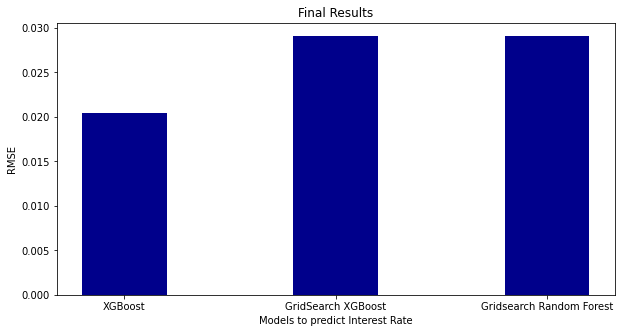

In [60]:
# create the dataset
data = {'XGBoost':0.020400030000555108, 'GridSearch XGBoost':0.02910346333352423
, 'Gridsearch Random Forest':0.02909145566645417}
Models = list(data.keys())
RMSE = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models, RMSE, color ='darkblue',
        width = 0.4)
 
plt.xlabel("Models to predict Interest Rate")
plt.ylabel("RMSE")
plt.title("Final Results")
plt.grid(False)
plt.show()

From the above graph we can see that out of all, the original XGBoost regressor model we built was the best performer. There are many potential enhancements that could be made to the XGBoost model for predicting the interest rate in the Lending Club dataset. Some ideas for further improvements include:


1.   Feature engineering: There are many ways to improve the predictive power of the model by creating new features from the existing data. For example, you could create interaction terms, aggregate features by grouping, or extract features from the dates.
2. Hyperparameter optimization: XGBoost has many hyperparameters that can be adjusted to improve the model's performance. A more thorough grid search or a more advanced optimization method, such as Bayesian optimization, could be used to find the optimal hyperparameter values.

3. Ensemble modeling: You could improve the model's performance by combining the predictions of several different models using ensemble methods, such as bagging or boosting.

4. Model interpretation: It would be useful to understand why the model is making certain predictions, particularly if the model is being used to make important decisions. Techniques like partial dependence plots and SHAP values can help to provide insight into the model's decision-making process.

5. Model validation: To ensure that the model is generalizable and robust, it is important to validate the model using techniques like cross-validation, out-of-sample testing, and holdout validation.

Additionally, during the development I assumed that the Lending Club dataset is clean and does not require extensive preprocessing or data cleaning. I also assumed that the goal of the model is to minimize the root mean squared error (RMSE) between the predicted and actual interest rates. 

If I had more time, I would try out different feature engineering techniques to see if they improve the model's performance. I would also try different models and compare their performance using cross-validation. Additionally, I would perform hyperparameter optimization to fine-tune the model and consider using ensemble methods to combine the predictions of multiple models. Finally, I would carefully validate the model using out-of-sample data and evaluate its performance on a variety of metrics to ensure that it is robust and generalizable.





